In [59]:
from pathlib import Path

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.metrics import (
    ConfusionMatrixDisplay,
    accuracy_score,
    f1_score,
    precision_score,
    recall_score,
)

In [60]:
# results_dir = Path("results") / "vulpi"
# results_dir = Path("results") / "husky"
results_dir = Path("results") / "data_concat"

values = np.load(results_dir / "results_hamming_CNN_mw_1.7.npy", allow_pickle=True).item()
# values = np.load(results_dir / "results_tsne_CNN_mw_1.7.npy", allow_pickle=True).item()
# values = np.load(results_dir / "results_CNN_optim6_mw_1.7.npy", allow_pickle=True).item()
# values = np.load(results_dir / "results_CNN_hamming_mw_1.7.npy", allow_pickle=True).item()
# values = np.load(results_dir / "results_hamming_aug_CNN_mw_1.7.npy", allow_pickle=True).item()
terrains = np.array([t for t in values["terrains"] if t != "MIXED"])
inv_terrains = {t: i for i, t in enumerate(terrains)}
values

{'pred': array([7, 0, 0, ..., 8, 8, 8]),
 'true': array([0, 0, 0, ..., 8, 8, 8]),
 'conf': array([[4.2722410e-01, 2.7985230e-05, 6.2787950e-07, ..., 1.3700522e-05,
         5.7084262e-01, 4.0709626e-08],
        [9.9999905e-01, 1.2096955e-13, 2.1612634e-13, ..., 2.5813983e-18,
         2.6686834e-08, 4.2544868e-15],
        [9.9999738e-01, 1.2714937e-10, 8.5005570e-12, ..., 4.5040755e-16,
         2.6621792e-06, 6.6309579e-12],
        ...,
        [3.1987613e-05, 4.3468979e-05, 2.2740910e-06, ..., 5.7634152e-06,
         5.4984084e-06, 9.9910551e-01],
        [2.5040376e-09, 1.2240607e-09, 2.5423587e-06, ..., 1.1305370e-09,
         2.0604578e-08, 9.9999750e-01],
        [1.3134942e-07, 1.7881995e-09, 1.5585119e-05, ..., 5.1463991e-07,
         1.1005574e-07, 9.9998367e-01]], dtype=float32),
 'ftime': array([], dtype=float64),
 'ptime': array([], dtype=float64),
 'channels': {'imu': {'wx': True,
   'wy': True,
   'wz': True,
   'ax': True,
   'ay': True,
   'az': True},
  'pro': {'vel

In [61]:
clf_values = values


# clf_values = values[1700]

def convert_to_int(x):
    if x.dtype == str:
        return np.array([inv_terrains[t] for t in x])
    return x


ypred = convert_to_int(clf_values["pred"])
ytest = convert_to_int(clf_values["true"])
terr_pred = terrains[ypred]
terr_test = terrains[ytest]

Text(0.5, 1.0, 'data_concat hamming window')

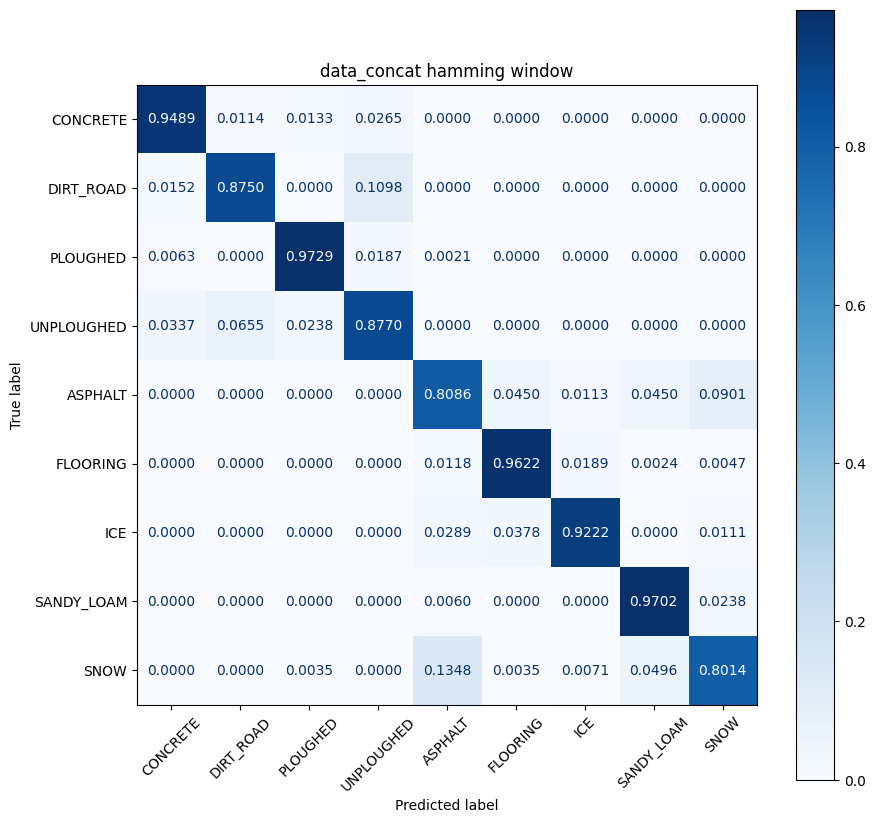

In [62]:
terrains = ["CONCRETE", "DIRT_ROAD", "PLOUGHED", "UNPLOUGHED", "ASPHALT", "FLOORING", "ICE", "SANDY_LOAM", "SNOW"]
disp = ConfusionMatrixDisplay.from_predictions(
    terr_test,
    terr_pred,
    labels=terrains,
    display_labels=terrains,
    normalize="true",
    values_format=".4f",
    cmap="Blues",
)
fig = disp.ax_.get_figure()
fig.set_figwidth(10)
fig.set_figheight(10)
disp.ax_.tick_params(axis='x', rotation=45)
disp.ax_.set_title(results_dir.stem + ' hamming window')

Text(0.5, 1.0, 'data_concat hamming window')

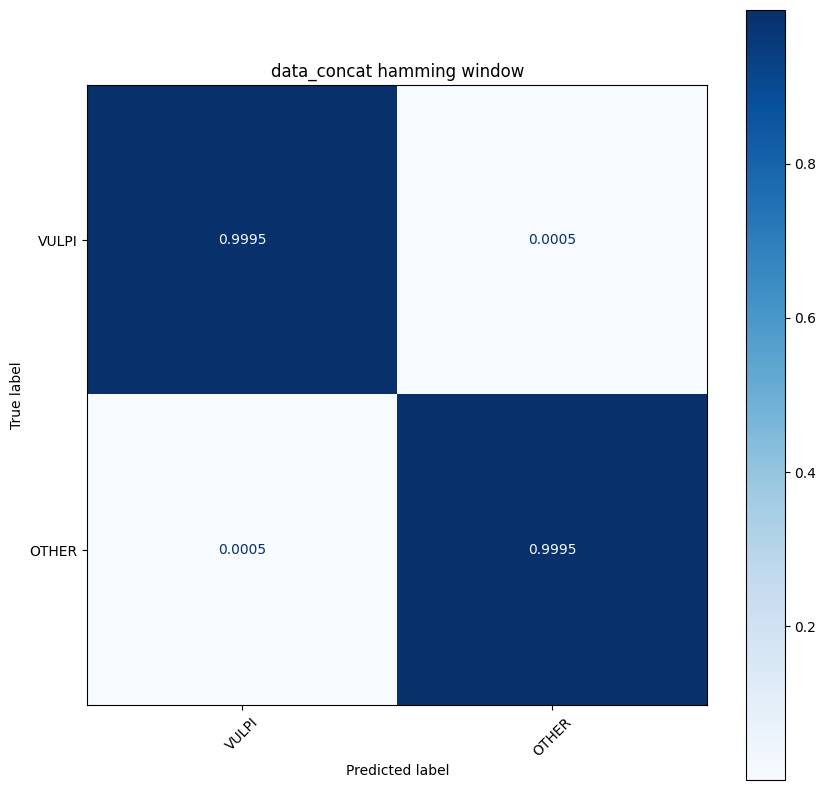

In [63]:
vulpi_terrain = ["CONCRETE", "DIRT_ROAD", "PLOUGHED", "UNPLOUGHED"]
terr_test_bi = np.isin(terr_test, vulpi_terrain)
terr_pred_bi = np.isin(terr_pred, vulpi_terrain)

disp = ConfusionMatrixDisplay.from_predictions(
    terr_test_bi,
    terr_pred_bi,
    labels=[True, False],
    display_labels=['VULPI', 'OTHER'],
    normalize="true",
    values_format=".4f",
    cmap="Blues",
)
fig = disp.ax_.get_figure()
fig.set_figwidth(10)
fig.set_figheight(10)
disp.ax_.tick_params(axis='x', rotation=45)
disp.ax_.set_title(results_dir.stem + ' hamming window')


Text(0.5, 1.0, 'data_concat')

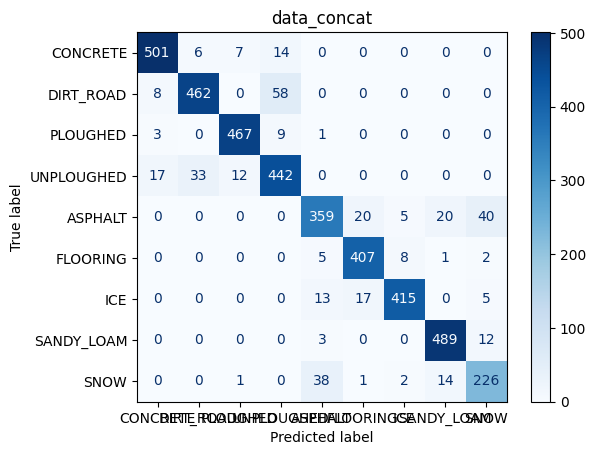

In [64]:
disp = ConfusionMatrixDisplay.from_predictions(
    terr_test,
    terr_pred,
    labels=terrains,
    display_labels=terrains,
    cmap="Blues",
)
disp.ax_.set_title(results_dir.stem)

In [65]:
metrics = pd.Series(
    {
        "accuracy": accuracy_score(
            ytest,
            ypred,
        ),
        "precision": precision_score(
            ytest,
            ypred,
            labels=terrains,
            average=None,
        ),
        "recall": recall_score(
            ytest,
            ypred,
            labels=terrains,
            average=None,
        ),
        "f1-score": f1_score(
            ytest,
            ypred,
            labels=terrains,
            average=None,
        ),
    }
)

/home/william/Documents/Programming/Vulpi2021-terrain-deep-learning/.venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/william/Documents/Programming/Vulpi2021-terrain-deep-learning/.venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1497: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/william/Documents/Programming/Vulpi2021-terrain-deep-learning/.venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1497: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted

In [66]:
metrics

accuracy                                          0.909486
precision    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
recall       [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
f1-score     [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
dtype: object

In [67]:
from sklearn.manifold import TSNE

k = 0

X = clf_values["repr"]
num_pred = X.shape[0]
fold_size = num_pred // 5
X = X[fold_size * k:fold_size * (k + 1)]
yytest = ytest[fold_size * k:fold_size * (k + 1)]
X_embedded = TSNE(n_components=2, perplexity=50, learning_rate=10).fit_transform(X)

# plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
# plt.show()

KeyError: 'repr'

In [ ]:
from utils import constants

for i, terrain in enumerate(terrains):
    c = constants.PLOTCOLORS[terrain.lower().replace("_", " ")]
    plt.scatter(X_embedded[yytest == i, 0], X_embedded[yytest == i, 1], 20, label=terrain, marker='.', c=c)
    if results_dir.stem == "vulpi":
        plt.xlim(-30, 40)
        plt.ylim(-30, 30)
    elif results_dir.stem == "husky":
        plt.xlim(-45, 45)
        plt.ylim(-45, 45)
    else:
        plt.xlim(-25, 25)
        plt.ylim(-25, 25)
    print(f'Generated for {terrain}')
    plt.plot()

plt.savefig(f'figs/{results_dir.stem}_total.pdf')
plt.show()
# ytest
for i, terrain in enumerate(terrains):
    c = constants.PLOTCOLORS[terrain.lower().replace("_", " ")]
    plt.scatter(X_embedded[yytest == i, 0], X_embedded[yytest == i, 1], 20, label=terrain, marker='.', c=c)
    if results_dir.stem == "vulpi":
        plt.xlim(-30, 40)
        plt.ylim(-30, 30)
    elif results_dir.stem == "husky":
        plt.xlim(-45, 45)
        plt.ylim(-45, 45)
    else:
        plt.xlim(-25, 25)
        plt.ylim(-25, 25)
    plt.savefig(f'figs/{results_dir.stem}_{terrain}.pdf')
    print(f'Generated for {terrain}')
    plt.plot()
    plt.show()


In [ ]:
k = 0

X = clf_values["repr"]
num_pred = X.shape[0]
fold_size = num_pred // 5
X = X[fold_size * k:fold_size * (k + 1)]
yytest = ytest[fold_size * k:fold_size * (k + 1)]
X_embedded = TSNE(n_components=3, perplexity=50, learning_rate=10, n_iter=2000).fit_transform(X)



In [ ]:
import matplotlib.animation as animation

ax = plt.figure().add_subplot(projection='3d')


for i, terrain in enumerate(terrains):
    ax.scatter(X_embedded[yytest == i, 0], X_embedded[yytest == i, 1], X_embedded[yytest == i, 2], "o", label=terrain, s=5, marker='.')

ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.show()

def rotate(angle):
    ax.view_init(azim=angle)

# rot_animation = animation.FuncAnimation(fig, rotate, frames=np.arange(0, 362, 2), interval=100)
# rot_animation.save('rotation.gif', dpi=80, writer='imagemagick')


In [ ]:

rot_animation.save('rotation.gif', dpi=80, writer='imagemagick')


In [ ]:
from sklearn.manifold import TSNE

k = 0

X = clf_values["repr"]
num_pred = X.shape[0]
fold_size = num_pred // 5
X = X[fold_size * k:fold_size * (k + 1)]
yytest = ytest[fold_size * k:fold_size * (k + 1)]
X_embedded = TSNE(n_components=2, perplexity=50, learning_rate=10, n_iter=2000).fit_transform(X)

# ytest
plt.plot(X_embedded[np.isin(yytest, vulpi_terrain), 0], X_embedded[np.isin(yytest, vulpi_terrain), 1], "o", label="VULPI")
plt.plot(X_embedded[~np.isin(yytest, vulpi_terrain), 0], X_embedded[~np.isin(yytest, vulpi_terrain), 1], "o", label="HUSKY")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()
